In [1]:
# Instalo alertas de estilo
# !pip install pycodestyle_magic pycodestyle flake8

In [2]:
# Activemos las alertas de estilo, luego en la entrega estan desactivadas
# Ya que me daba error el ejercicio 5 con ellas
# %load_ext pycodestyle_magic
# %pycodestyle_on

# Ejercicio 3 - Captura de información de una web (Web Scraping) (1,25 puntos)

En este ejercicio vamos a extraer información de la web http://quotes.toscrape.com/ utilizando dos librerías de Python: requests y BeautifulSoup



### Explicación previa

Requests es una librería muy famosa en Python para hacer peticiones HTTP.

In [3]:
import requests
import bs4


res = requests.get('http://quotes.toscrape.com/')
print(res.status_code)
# Un status code igual a 200 significa que la petición fue correcta
# https://en.wikipedia.org/wiki/List_of_HTTP_status_codes
print(res.text[0:300])

200
<!DOCTYPE html>
<html lang="en">
<head>
	<meta charset="UTF-8">
	<title>Quotes to Scrape</title>
    <link rel="stylesheet" href="/static/bootstrap.min.css">
    <link rel="stylesheet" href="/static/main.css">
</head>
<body>
    <div class="container">
        <div class="row header-box">
          


Para extraer información del HTML usaremos la librería Beautiful Soup.
BeautifulSoup nos permite parsear el HTML y ofrece métodos para seleccionar tags y elementos del HTML.

In [4]:
# Mostrar el texto del primer tag h1
soup = bs4.BeautifulSoup(res.text)
h1_tag = soup.select('h1')
if (h1_tag):
    print(h1_tag[0].text)


Quotes to Scrape



Antes de iniciar el proceso de Web Scraping es interesante inspeccionar el código HTML de http://quotes.toscrape.com/.
Para ello vamos a la web desde un navegador y hacemos clic derecho en cualquier lugar y seleccionamos la opción
'Inspeccionar'. Podemos expandir y contraer varios nodos y encontrar el código fuente para una parte específica de la página.



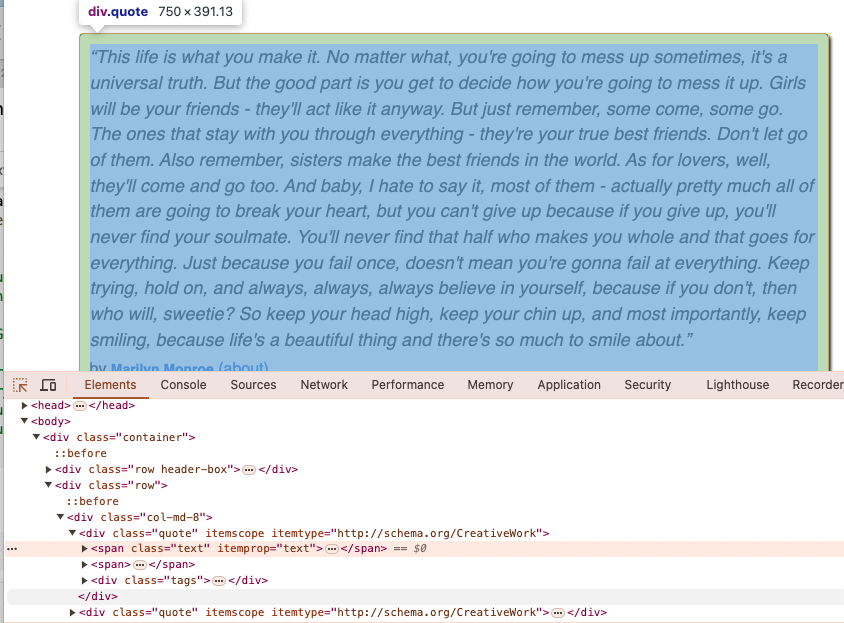

## 3.1 Obtener los tags que contengan las citas de las 10 primeras páginas. Mostrar por terminal el texto de la cita (0,5 ptos)
Sólo se debe mostrar el texto de la cita, no hay que mostrar el autor ni otra información adicional. Podemos apoyarnos de la documentación oficial de [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) y la información sobre los CSS Selectors contenida en [W3Schools](https://www.w3schools.com/cssref/css_selectors.php).

Fíjate que la URL cambia cuando avanzamos de página!

In [5]:
from bs4 import BeautifulSoup


todas_las_citas = []
for i in range(1, 11):  # Iterar a través de las 10 primeras páginas
    url = f"http://quotes.toscrape.com/page/{i}/"
    miRespuesta = requests.get(url)
    if miRespuesta.status_code == 200:
        miSopaBonita = BeautifulSoup(miRespuesta.text, 'html.parser')
        # Buscar todos los elementos que contengan las citas
        misCitas = miSopaBonita.find_all('span', {'class': 'text'})
        for cita in misCitas:
            todas_las_citas.append(cita.text)
    else:
        print(f"Error al acceder a la página {i}")

In [6]:
for cita in todas_las_citas:
    print(cita)

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”
“This life is what you make it. No matter what, you're going to mess up sometimes, it's a unive

## 3.2 Se pide extraer los nombres de personas **mencionadas** en las citas (obtenidas en el apartado anterior) usando la librería Spacy! (0,75 ptos)

La librería [spaCy](https://spacy.io/usage/spacy-101) es una librería de código abierto para hacer tareas de Procesamiento de Lenguaje Natural (nlp).
spaCy incluye modelos pre-entrenados para [reconocer entidades nombradas](https://spacy.io/usage/spacy-101#annotations-ner) en los textos (como lugares, nombre de compañías, fechas, etc).




In [7]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Podemos obtener más información sobre el modelo
# https://spacy.io/models/en

In [8]:
# TODO

# Conjunto para almacenar los nombres sin duplicados
nombres_unicos = set()

# Procesar todas las citas acumuladas con spaCy
for texto_cita in todas_las_citas:
    doc = nlp(texto_cita.strip())
    for entidad in doc.ents:
        if entidad.label_ == 'PERSON':
            # Añadir nombres a un conjunto para evitar duplicados
            nombres_unicos.add(entidad.text)
# Convertir el conjunto de nombres a una lista
nombres_en_lista = list(nombres_unicos)

# Imprimir la lista de nombres únicos
print(nombres_en_lista)


['Youer', 'Bella', 'Cedric Diggory', 'Jojen', 'Harry']


# Ejercicio 4 - Captura de información del [repositorio de la UOC](https://openaccess.uoc.edu) y de PDFs (2,25 puntos)

### Explicación previa

El repositorio de la UOC cuenta con un buscador que nos permite filtrar documentos.

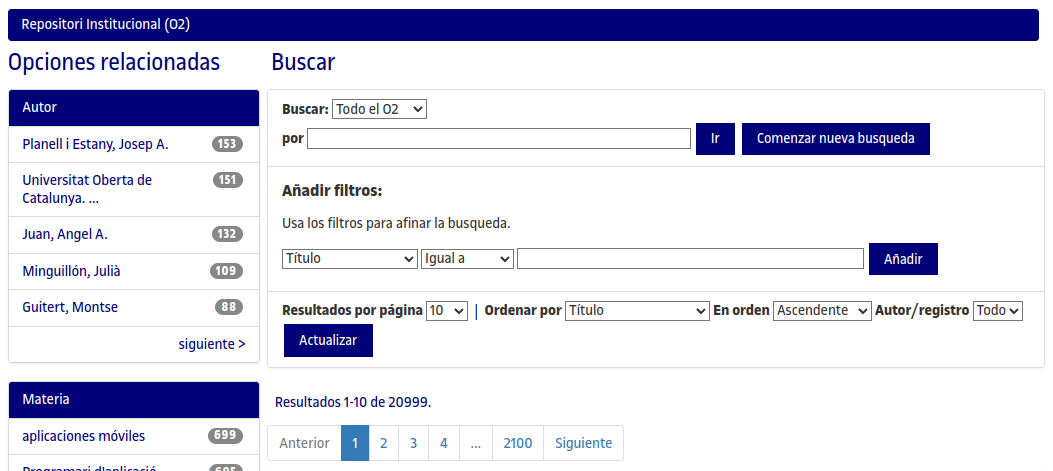

## 4.1 Implementar código Python para descargar publicaciones (pdfs) del repositorio de la UOC cuyo título contenga la palabra Chatgpt y el autor no sea la Universitat Oberta de Catalunya (deben ser TFMs de alumnos). (1pto)

In [9]:
import requests
from bs4 import BeautifulSoup
import os
from typing import Set


def descargar_pdf(url: str, directorio: str, url_procesada: Set[str]):
    """
    Descarga un archivo PDF desde una URL dada
    si no ha sido descargado anteriormente.

    Args:
    url (str): URL del archivo PDF a descargar.
    directorio (str): Directorio local donde se guardarán los PDF.
    url_procesada (set): URLs ya usadas para evitar descargas duplicadas.
    """
    # Compruebo si la url ya ha sido descargada
    if url not in url_procesada:
        # Como no esta en la lista de url ya procesadas, la agrego para
        # que la proxima vez, no la descargue
        url_procesada.add(url)
        # Respuesta http, si el 200 es que todo va bien
        response = requests.get(url)
        if response.status_code == 200:
            # Separo en partes la url y me quedo con la ultima parte
            # El delimitador es / entonces tendremos el nombre limpio
            # del archivo pdf
            file_name = url.split('/')[-1]
            # Digo la ruta donde va a guardarse el archivo
            file_path = os.path.join(directorio, file_name)
            with open(file_path, 'wb') as file:
                # response es el archivo que contiene el pdf
                # y con la clase file y metodo write, lo guardamos
                file.write(response.content)
            print(f"Descargado: {file_name}")
        else:
            print("Error descargando el archivo PDF")


def encontrar_y_descargar_pdfs(url: str,
                               directorio: str,
                               url_procesada: Set[str]):
    """
    Encuentra y descarga todos los PDF en una página de
    seleccionada en la busqueda de la biblioteac de la UOC.

    Args:
    url (str): URL donde se encuentran los enlaces a un PDF.
    directorio (str): Directorio local para guardar los PDFs descargados.
    url_procesada (set): URLs procesadas para evitar duplicados.
    """
    # Respuesta de la web
    detail_response = requests.get(url)
    # print(detail_response)
    # Compruebo respuesta exitosa del servidor (codigo 200)
    if detail_response.status_code == 200:
        # Creo un objeto BS para analizar la respuesta
        miSopaBonita = BeautifulSoup(detail_response.text, 'html.parser')
        # Busco los enlaces con la etiqueta <a> que tienen un link (href)
        pdf_links = miSopaBonita.find_all('a', href=True)
        # Itero cada elemento encontrado:
        for pdf_link in pdf_links:
            # print(pdf_link['href'])
            # Dentro de pdf_link existen cadenas de texto que llevan a la
            # descarga del archivo, que contienen bitstream para el pdf o
            # handle para la pagina del articulo, vamos a usar bitstream
            if 'bitstream' in pdf_link['href']:
                # Si encuentra la palabra, monto la url de descarga
                pdf_url = f"https://openaccess.uoc.edu{pdf_link['href']}"
                # Llamo a la funcion descargar pdf
                descargar_pdf(pdf_url, directorio, url_procesada)
    else:
        print(f"Error al acceder a la página de detalles: {url}")


# Donde voy a guardar los PDF
directorio = 'archivos_pdf_tfm_uoc'
# Creo el directorio
os.makedirs(directorio, exist_ok=True)

# URL de la página de búsqueda con los filtros
# Entrando en openaccess.uoc.edu se hace la busqueda para entender
# la API de acceso y asi poder luego usar la url para buscar contenido
# Ademas podemos poner la url en crudo, o montarla con variables para
# que si la busqueda la queremos hacer para otros filtros, podamos
# reutilizarlas mas facilmente.
base_url = (
    "https://openaccess.uoc.edu/simple-search?location=&query=&"
    "filter_field_1=author&filter_type_1=notcontains&"
    "filter_value_1=Universitat+Oberta+de+Catalunya&"
    "filter_field_2=title&filter_type_2=contains&filter_value_2=ChatGPT&"
    "filtername=type&filtertype=equals&filterquery=info%3Aeu-repo%2F"
    "semantics%2FmasterThesis&rpp=10&sort_by=dc.title_sort&order=asc"
)

# Respuesta del servidor para entrar en el if si es la respuesta 200
response = requests.get(base_url)
# Compruebo respuesta exitosa del servidor (codigo 200)
if response.status_code == 200:
    # Creo un objeto BS para analizar la respuesta
    miSopaBonita = BeautifulSoup(response.text, 'html.parser')
    # print(miSopaBonita.text)
    # Busco links que tienen etiqueta a y atributo href
    links = miSopaBonita.find_all('a', href=True)
    # Creo un objeto para llevar el control de las paginas que ya ha visitado
    # Ya que sino puede ir varias veces si hay varias referencias
    url_procesada = set()
    for link in links:
        # Como he comentado antes, si tiene handle va a la pagina del articulo
        # Si tiene bitstream, va al archivo pdf
        if 'handle' in link['href']:
            url_articulo = f"https://openaccess.uoc.edu{link['href']}"
            # Llamo a la funcion que busca pdf
            # Le pasamos una url, un directorio para guardar el pdf
            # y la lista de url ya procesadas.
            encontrar_y_descargar_pdfs(url_articulo, directorio, url_procesada)
else:
    print("Error al acceder al repositorio")

Descargado: Canfran_ccanfran_6___Comparte_tu_recorrido__18-06-2023_09_16_42-3.pdf
Descargado: cvazquezforTFM0623memoria.pdf



## 4.2 Implementar código Python para extraer todas las urls que aparecen en el contenido de los pdfs (descargados en el apartado anterior). Las urls detectadas en cada pdf se deben almacenar en un csv. (1 pto)

Una posible librería de Python para procesar PDFs es PyPDF2 cuya documentación oficial se puede encontrar en el siguiente [enlace](https://pypdf2.readthedocs.io/en/3.x/).

In [10]:
!pip install PyPDF2
# TODO

In [11]:
import os
import csv
from PyPDF2 import PdfReader
import re
from typing import List


def extraer_urls_de_pdf(directorio_pdf: str) -> List[str]:
    """
    Extrae las URLs encontradas en los PDF dentro de un directorio dado.

    Args:
    directorio_pdf (str): Ruta al directorio que contiene los documentos

    Returns:
    List[str]: Una lista de las URL encontradas en los PDF.

    """
    # Lista para almacenar todas las URL encontradas
    urls_encontradas = []
    # Pongo aqui la exp reg para no sobrepasar los 79 caracteres por linea
    # De las reglas de estilo PEP8
    # Expresion regular que utilizare
    expreg = [r'http[s]?://(?:[a-zA-Z]|[0-9]|'
              '[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+']
    # Recorrer todos los archivos en el directorio especificado
    for nombreArchivo in os.listdir(directorio_pdf):
        # Si termina en pdf
        if nombreArchivo.endswith('.pdf'):
            # Monto la ruta
            ruta = os.path.join(directorio_pdf, nombreArchivo)
            try:
                # Abrir el PDF
                lectorPDF = PdfReader(ruta)
                # Recorrer cada página en el PDF
                for pagina in lectorPDF.pages:
                    # Extraer el texto de cada página
                    texto = pagina.extract_text()
                    if texto:
                        # Encontrar todas las URLs usando una expresión regular
                        urls = re.findall(expreg[0], texto)
                        urls_encontradas.extend(urls)
            except Exception as e:
                print(f"Error procesando {ruta}: {e}")

    return urls_encontradas


def guardar_urls_en_csv(urls: List[str], archivo_csv: str) -> None:
    """
    Guarda la lista de URLs en un archivo CSV.

    Args:
    urls (List[str]): Lista de URL a guardar.
    archivo_csv (str): Ruta al archivo CSV.

    """
    with open(archivo_csv, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        # Cabecera del archivo CSV
        writer.writerow(['Número', 'URL'])
        # Con la ayuda de un indice, itero las URL
        # y las escribo junto al indice
        for index, url in enumerate(urls, start=1):
            writer.writerow([index, url])


# Archivo CSV donde se guardarán las URLs
archivo_csv = 'urls_encontradas.csv'

# Extraer URLs
urls = extraer_urls_de_pdf(directorio)

# Guardar URLs en un archivo CSV
guardar_urls_en_csv(urls, archivo_csv)

## 4.3 Implementar código Python para extraer los metadatos de los pdfs descargados. Los metadatos de cada pdf se deben almacenar en un json. (0,25 ptos)

In [12]:
import os
import json
from typing import Dict
from PyPDF2 import PdfReader


def extraer_metadatos_pdf(directorio_pdf: str) -> str:
    """
    Extrae los metadatos de todos los archivos PDF en un directorio dado.

    Args:
        directorio_pdf (str): Ruta al directorio.

    Returns:
        str: Cadena del diccionario con los nombres de los archivos como claves
             y los metadatos como valores, que son también cadenas de
             diccionarios.

    """
    # Diccionario donde almacenara los metadatos
    metadatos_pdf = {}

    for nombre_archivo in os.listdir(directorio_pdf):
        if nombre_archivo.endswith('.pdf'):
            ruta = os.path.join(directorio_pdf, nombre_archivo)
            try:
                # Abrimos el PDF
                lector = PdfReader(ruta)
                # Obtenemos los metadatos del PDF
                metadata = lector.metadata  # Obtener los metadatos del PDF
                metadatos_limpios = {}
                for clave, valor in metadata.items():
                    # Las claves de estos archivos PDF empiezan por '/'
                    # Y la eliminamos:
                    nueva_clave = clave[1:]
                    metadatos_limpios[nueva_clave] = valor
                # Asignamos la variable que vamos a devolver los datos limpios
                metadatos_pdf[nombre_archivo] = metadatos_limpios
            except Exception as e:
                print(f"Error procesando {ruta}: {e}")

    return metadatos_pdf


def guardar_metadatos_en_json(metadatos: str,
                              archivo_json: str) -> None:
    """
    Guarda los metadatos extraidos en un archivo JSON.

    Args:
        metadatos (str): Cadena del diccionario metadatos a guardar.
        archivo_json (str): Ruta archivo JSON a guardar metadatos.

    """
    with open(archivo_json, 'w', encoding='utf-8') as file:
        # Guarda en formato JSON el diccionario
        json.dump(metadatos, file, indent=4)


# Nombre del archivo
archivo_json = 'metadatos_pdf.json'

# Llamada a la funcion de extraer metadatos
metadatos = extraer_metadatos_pdf(directorio)

# Llamar a la funcion de guardar metadatos
guardar_metadatos_en_json(metadatos, archivo_json)


# Ejercicio 5 : RDF y RDFS (2 ptos)

En este notebook vamos a utilizar algunas librerías python útiles para trabajar con tripletas:

*   `rdflib` para trabajar con tripletas RDF
*   `rdflib-jsonld` para usar JSON-LD
*   `SPARQLWrapper` para ejecutar consultas SPARQL e importar los resultados en el notebook
*   `pydotplus` y `graphviz` para visualizar los grafos.

Efectuamos la instalación de las librerías:

In [13]:
! pip install rdflib
! pip install rdflib-jsonld
! pip install -q sparqlwrapper
! pip install pydotplus
! pip install graphviz

Efectuamos la importación de aquellas librerías y funciones requeridas que utilizaremos.

In [14]:
import io
from rdflib import Graph as RDFGraph
from rdflib import Namespace, URIRef, Literal, BNode
from rdflib.namespace import NamespaceManager
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph,rdflib_to_networkx_multidigraph
import rdflib_jsonld
from SPARQLWrapper import SPARQLWrapper, JSON, XML, N3, RDF , POST, GET, POSTDIRECTLY, CSV

import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
import pprint
import statistics
import collections
import warnings

import networkx as nx
warnings.filterwarnings ("ignore")

/usr/local/lib/python3.10/dist-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(



Las funciones de la librería `rdflib` permiten convertir los datos en un grafo `RDFGraph` con el que cargar los datos. Analicemos el ejemplo inferior.



In [15]:
rdf = '''\
<http://burningbird.net/articles/monsters3.htm> <http://burningbird.net/postcon/elements/1.0/author> "Shelley Powers" .
<http://burningbird.net/articles/monsters3.htm> <http://burningbird.net/postcon/elements/1.0/title> "Architeuthis Dux" .
'''

En este caso vamos a ver el número de tripletas de las que disponemos e imprimirlas.

In [16]:
g = RDFGraph()  # Instanciamos la clase RDFGraph
g.parse( data=rdf, format ="n3") # Cargamos los datos en formato N3 con el método parse. Si no se especifica el formato el método trata de parsear con Turtle.

print(f'El número de tripletas es: {len(g)}') #Vemos la longitud, es decir, el número de tripletas

for tripleta in g:
    pprint.pprint(tripleta)   #Imprimimos las tripletas



El número de tripletas es: 2
(rdflib.term.URIRef('http://burningbird.net/articles/monsters3.htm'),
 rdflib.term.URIRef('http://burningbird.net/postcon/elements/1.0/title'),
 rdflib.term.Literal('Architeuthis Dux'))
(rdflib.term.URIRef('http://burningbird.net/articles/monsters3.htm'),
 rdflib.term.URIRef('http://burningbird.net/postcon/elements/1.0/author'),
 rdflib.term.Literal('Shelley Powers'))


Es posible extraer los datos usando las [funciones incluidas](https://rdflib.readthedocs.io/en/stable/) en el paquete `rdflib`:




In [17]:
for h, r, t in g.triples((None,None,None)):
  print( " %s  -- %s --> %s  "  % (h, r ,t) )

print  ()
print ("Sujetos")
print ("----------")
for p in g.subjects():
  print (p)

print ("Predicados")
print ("----------")
for p in g.predicates():
  print (p)

print ("Objetos")
print ("----------")
for p in g.objects():
  print (p)

 http://burningbird.net/articles/monsters3.htm  -- http://burningbird.net/postcon/elements/1.0/title --> Architeuthis Dux  
 http://burningbird.net/articles/monsters3.htm  -- http://burningbird.net/postcon/elements/1.0/author --> Shelley Powers  

Sujetos
----------
http://burningbird.net/articles/monsters3.htm
http://burningbird.net/articles/monsters3.htm
Predicados
----------
http://burningbird.net/postcon/elements/1.0/title
http://burningbird.net/postcon/elements/1.0/author
Objetos
----------
Architeuthis Dux
Shelley Powers


En este caso tenemos un sujeto común para las dos tripletas. También posible  consultar las tripletas almacenadas en un grafo mediante consultas SPARQL.

In [18]:
q ='''
    SELECT ?h ?r ?t
     WHERE {
        ?h ?r ?t
     }
'''

result = g.query (q)

for row in result:
    print(row)   # imprimir las tripletas


(rdflib.term.URIRef('http://burningbird.net/articles/monsters3.htm'), rdflib.term.URIRef('http://burningbird.net/postcon/elements/1.0/title'), rdflib.term.Literal('Architeuthis Dux'))
(rdflib.term.URIRef('http://burningbird.net/articles/monsters3.htm'), rdflib.term.URIRef('http://burningbird.net/postcon/elements/1.0/author'), rdflib.term.Literal('Shelley Powers'))


Aunque resulta más cómodo representarlas en froma de grafo.

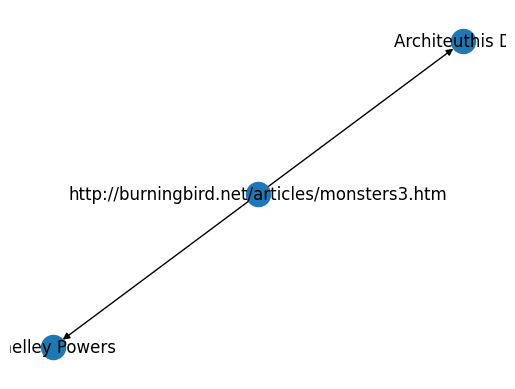

In [19]:
g = RDFGraph()
result = g.parse( data=rdf, format ="n3")

G = rdflib_to_networkx_multidigraph(g)

# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=2)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

#if not in interactive mode for
plt.show()

Con el grafo generado es posible obtener cualquiera de los otros formatos RDF  con la función `serialize`.

In [20]:
target_pretty = g.serialize(format="pretty-xml")
print(target_pretty)

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
  xmlns:ns1="http://burningbird.net/postcon/elements/1.0/"
  xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://burningbird.net/articles/monsters3.htm">
    <ns1:author>Shelley Powers</ns1:author>
    <ns1:title>Architeuthis Dux</ns1:title>
  </rdf:Description>
</rdf:RDF>



Con *RDF Schema* se pueden especificar clases y jerarquías.

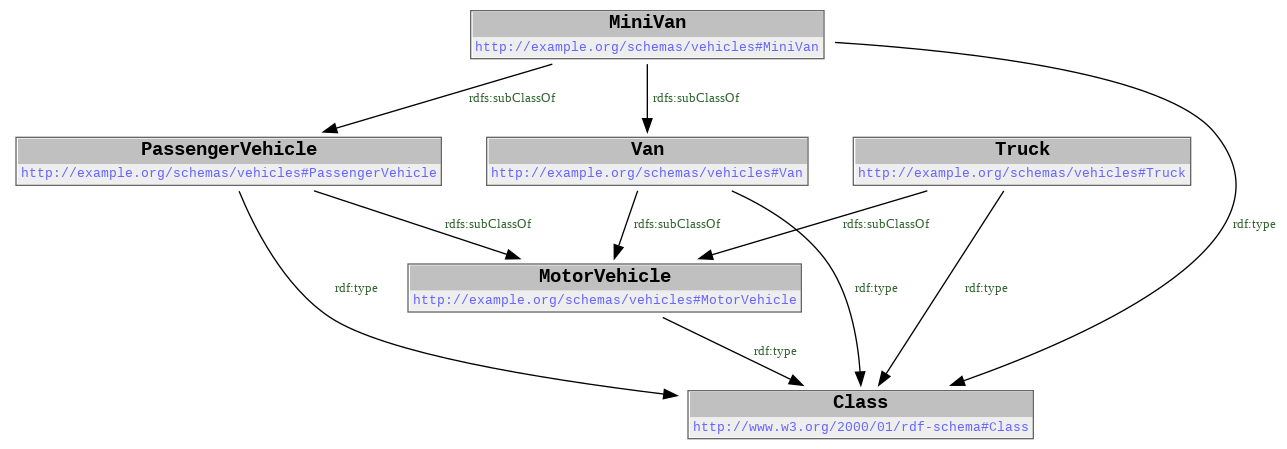

In [21]:
vehicles_data = """\
@prefix ex: <http://example.org/schemas/vehicles#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
ex:MotorVehicle       rdf:type          rdfs:Class .
ex:PassengerVehicle   rdf:type          rdfs:Class .
ex:Van                rdf:type          rdfs:Class .
ex:Truck              rdf:type          rdfs:Class .
ex:MiniVan            rdf:type          rdfs:Class .

ex:PassengerVehicle   rdfs:subClassOf   ex:MotorVehicle .
ex:Van                rdfs:subClassOf   ex:MotorVehicle .
ex:Truck              rdfs:subClassOf   ex:MotorVehicle .

ex:MiniVan            rdfs:subClassOf   ex:Van .
ex:MiniVan            rdfs:subClassOf   ex:PassengerVehicle .
"""

veh_g = RDFGraph()
veh_g.parse (data=vehicles_data, format="n3")


def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize( veh_g )

Como `rdfs:SubClass` es transitiva y reflexiva, es posible deducir hechos que no están directamente explicitados en las tripletas originales. Si hacemos una consulta para seleccionar los vehículos de motor con SPARQL:

In [22]:
result = veh_g.query("""SELECT DISTINCT ?s
                    WHERE
                    {
                      ?s ?p ?o .
                      ?s rdfs:subClassOf+ ex:MotorVehicle .
                    }""", initNs={'rdf' : RDF, 'ex' : 'http://example.org/schemas/vehicles#'})

for row in result:
  print (row)

(rdflib.term.URIRef('http://example.org/schemas/vehicles#PassengerVehicle'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#MiniVan'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#Van'),)
(rdflib.term.URIRef('http://example.org/schemas/vehicles#Truck'),)


Advertir que tanto `MiniVan` se muestra como `MotorVehicle` aunque no hay una tripleta que lo indique directamente (transitivamente a través de `PassengerVehicle`).

Ahora es tu turno. Vamos a trabajar con las siguientes tripletas sobre Nintendo. Completa los elementos que faltan donde se especifica con #TODO para obtener un grafo consistente.

In [23]:
prefixes = """\
@prefix ex: <http://example.org/demo/#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix dbp: <http://dbpedia.org/resource/> .
@prefix dbpp: <http://dbpedia.org/property/> .
@prefix dbo: <http://dbpedia.org/ontology/> .

"""

data = """\

dbp:Nintendo rdf:____ dbo:Company .  # TODO rdf:____
dbp:Nintendo rdfs:____ "Nintendo"@es .  # TODO rdfs:_____

dbp:Nintendo_Switch rdf:type dbo:_______ .  #TODO  dbo:_______
dbp:Nintendo_Switch dbo:manufacturer dbp:________ .  #TODO dbp:_____
dbp:Nintendo_Switch rdfs:label "Nintendo Switch"@es .

dbp:Super_Mario_Odyssey rdf:type dbo:________ .  #TODO: dbo:________
dbp:Super_Mario_Odyssey dbo:_______ dbp:Nintendo_Switch .  #TODO   dbo:_______
dbp:Super_Mario_Odyssey rdfs:label "Super Mario Odyssey"@es .

dbp:Shigeru_Miyamoto rdf:type dbo:_______ .  #TODO dbo:_____
dbp:Shigeru_Miyamoto dbo:employer dbp:______ .  #TODO dbp:______
dbp:Shigeru_Miyamoto rdfs:label "Shigeru Miyamoto"@es .
dbp:Shigeru_Miyamoto dbo:notableWork dbp:Super_Mario_Odyssey .
"""
data = """
dbp:Nintendo rdf:type dbo:Company .
dbp:Nintendo rdfs:label "Nintendo"@es .

dbp:Nintendo_Switch rdf:type dbo:Product .
dbp:Nintendo_Switch dbo:manufacturer dbp:Nintendo .
dbp:Nintendo_Switch rdfs:label "Nintendo Switch"@es .

dbp:Super_Mario_Odyssey rdf:type dbo:VideoGame .
dbp:Super_Mario_Odyssey dbo:platform dbp:Nintendo_Switch .
dbp:Super_Mario_Odyssey rdfs:label "Super Mario Odyssey"@es .

dbp:Shigeru_Miyamoto rdf:type dbo:Person .
dbp:Shigeru_Miyamoto dbo:employer dbp:Nintendo .
dbp:Shigeru_Miyamoto rdfs:label "Shigeru Miyamoto"@es .
dbp:Shigeru_Miyamoto dbo:notableWork dbp:Super_Mario_Odyssey .

"""
gx = RDFGraph()

# TODO
gx.parse(data=prefixes+data, format="n3")

<Graph identifier=Naea415c134594c89aafdfa160ff7f0ff (<class 'rdflib.graph.Graph'>)>

In [24]:
print(f'El número de tripletas es: {len(gx)}')

for triplet in gx:
    print(triplet)


El número de tripletas es: 12
(rdflib.term.URIRef('http://dbpedia.org/resource/Shigeru_Miyamoto'), rdflib.term.URIRef('http://dbpedia.org/ontology/notableWork'), rdflib.term.URIRef('http://dbpedia.org/resource/Super_Mario_Odyssey'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Nintendo_Switch'), rdflib.term.URIRef('http://dbpedia.org/ontology/manufacturer'), rdflib.term.URIRef('http://dbpedia.org/resource/Nintendo'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Super_Mario_Odyssey'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/ontology/VideoGame'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Super_Mario_Odyssey'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Super Mario Odyssey', lang='es'))
(rdflib.term.URIRef('http://dbpedia.org/resource/Nintendo_Switch'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://dbpedia.org/

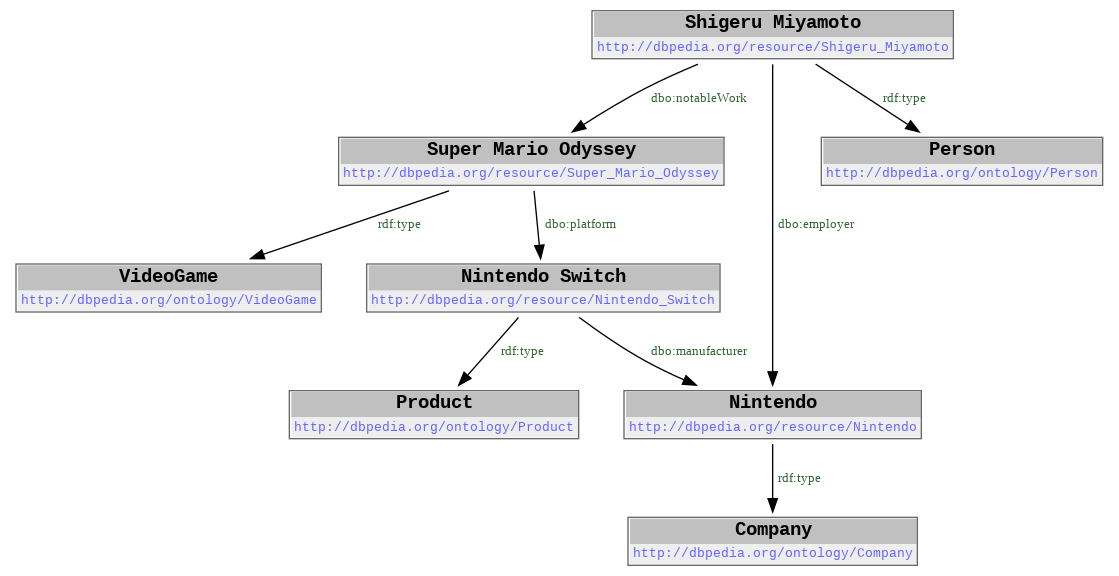

In [25]:
visualize(gx)

Serializar el grafo obtenido como Turtle:

In [26]:
gx.serialize(format="turtle")

'@prefix dbo: <http://dbpedia.org/ontology/> .\n@prefix dbp: <http://dbpedia.org/resource/> .\n@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .\n\ndbp:Shigeru_Miyamoto a dbo:Person ;\n    rdfs:label "Shigeru Miyamoto"@es ;\n    dbo:employer dbp:Nintendo ;\n    dbo:notableWork dbp:Super_Mario_Odyssey .\n\ndbp:Nintendo_Switch a dbo:Product ;\n    rdfs:label "Nintendo Switch"@es ;\n    dbo:manufacturer dbp:Nintendo .\n\ndbp:Super_Mario_Odyssey a dbo:VideoGame ;\n    rdfs:label "Super Mario Odyssey"@es ;\n    dbo:platform dbp:Nintendo_Switch .\n\ndbp:Nintendo a dbo:Company ;\n    rdfs:label "Nintendo"@es .\n\n'

Veamos otro ejemplo de grafo sobre libros de ciencia ficción:

In [27]:
prefix = '''
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

'''


data = '''
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

dbr:Dune dbo:author dbr:Frank_Herbert .
dbr:Dune rdf:type dbo:Book .
dbr:Dune dbo:genre dbr:Science_fiction .

dbr:Foundation dbo:author dbr:Isaac_Asimov .
dbr:Foundation rdf:type dbo:Book .
dbr:Foundation dbo:genre dbr:Science_fiction .

dbr:The_Da_Vinci_Code dbo:author dbr:Dan_Brown .
dbr:The_Da_Vinci_Code rdf:type dbo:Book .
dbr:The_Da_Vinci_Code dbo:genre dbr:Mystery .

dbr:Gone_Girl dbo:author dbr:Gillian_Flynn .
dbr:Gone_Girl rdf:type dbo:Book .
dbr:Gone_Girl dbo:genre dbr:Mystery .

dbr:The_Girl_with_the_Dragon_Tattoo dbo:author dbr:Stieg_Larsson .
dbr:The_Girl_with_the_Dragon_Tattoo rdf:type dbo:Book .
dbr:The_Girl_with_the_Dragon_Tattoo dbo:genre dbr:Mystery .

dbr:In_the_Woods dbo:author dbr:Tana_French .
dbr:In_the_Woods rdf:type dbo:Book .
dbr:In_the_Woods dbo:genre dbr:Mystery .

'''

Construir un Grafo (To Do)

In [28]:
g2= RDFGraph()
# TODO
g2.parse(data=data, format="n3")


<Graph identifier=Nc93f73ad62014539842b19b63c6e9161 (<class 'rdflib.graph.Graph'>)>

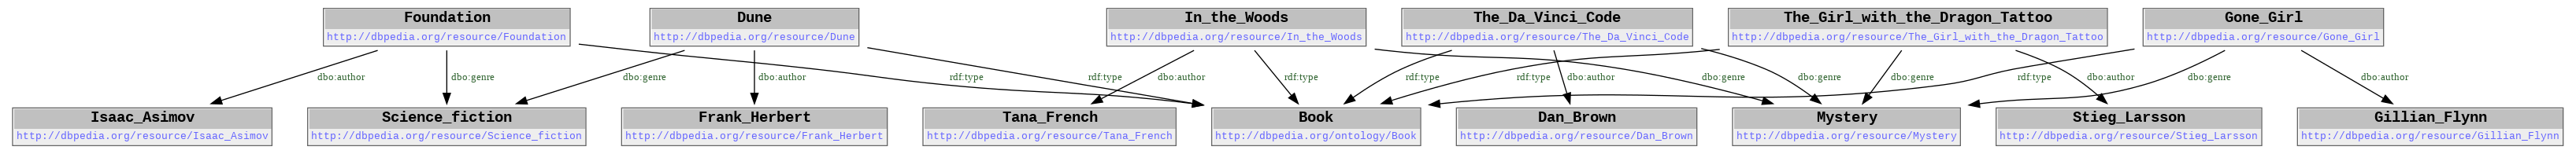

In [29]:
visualize(g2)

Añade uno de tus libros favoritos al grafo:  

In [30]:
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL, \
                           PROF, PROV, RDF, RDFS, SDO, SH, SKOS, SOSA, SSN, TIME, \
                           VOID, XMLNS, XSD
dbr = Namespace ('http://dbpedia.org/resource/')
dbo = Namespace ('http://dbpedia.org/ontology/')


# TODO
# Añadir tripletas
g2.add((dbr.The_Lord_of_the_Kings, RDF.type, dbo.Book))

g2.add((dbr.The_Lord_of_the_Kings, dbo.author, dbr.JR_Tolkien))
g2.add((dbr.The_Lord_of_the_Kings, dbo.genre, dbr.Science_fiction))






#g2.add((dbr:The_Lord_of_the_Kings dbo:author dbr:JR_Tolkien))
#g2.add((dbr:The_Lord_of_the_Kings rdf:type dbo:Book))
#g2.add((dbr:The_Lord_of_the_Kings dbo:genre dbr:Science_fiction))



<Graph identifier=Nc93f73ad62014539842b19b63c6e9161 (<class 'rdflib.graph.Graph'>)>

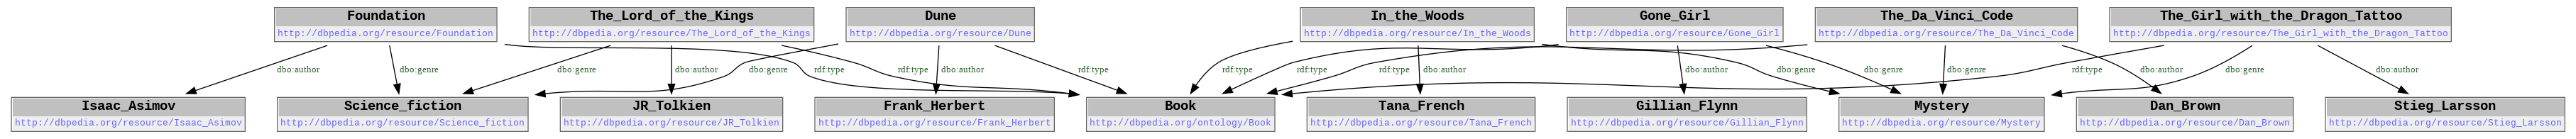

In [31]:
visualize(g2)

Obtener de este grafo las novelas que son de misterio

In [32]:
result = g2.query("""
SELECT ?book WHERE {
  ?book rdf:type dbo:Book .
  ?book dbo:genre dbr:Mystery .
}
""")
for row in result:
  print (row)

(rdflib.term.URIRef('http://dbpedia.org/resource/The_Da_Vinci_Code'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/Gone_Girl'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/The_Girl_with_the_Dragon_Tattoo'),)
(rdflib.term.URIRef('http://dbpedia.org/resource/In_the_Woods'),)


Crea un grafo sobre un tema que te interese y plantea 2 queries

In [33]:
dba = Namespace('http://libros.org/')
dbo = Namespace('http://dbpedia.org/ontology/')
rdf = Namespace('http://www.w3.org/1999/02/22-rdf-syntax-ns#')
dbr = Namespace('http://prueba.org/relaciones/' )
dbp = Namespace('http://prueba.org/personajes/' )
g3 = RDFGraph()

g3.add((dba.The_Lord_of_the_Rings, RDF.type, dba.Book))
g3.add((dba.The_Lord_of_the_Rings, dba.autor, dba.J_R_R_Tolkien))
g3.add((dba.The_Lord_of_the_Rings, dba.generoLiterario, dba.CienciaFiccion))


g3.add((dba.The_Lord_of_the_Rings, dbo.personaje, dbp.Frodo_Baggins))
g3.add((dba.The_Lord_of_the_Rings, dbo.personaje, dbp.Aragorn))
g3.add((dba.The_Lord_of_the_Rings, dbo.personaje, dbp.Sauron))
g3.add((dba.The_Lord_of_the_Rings, dbo.personaje, dbp.Gandalf))
g3.add((dbp.Frodo_Baggins, dbr.amigo, dbp.Aragorn))
g3.add((dbp.Frodo_Baggins, dbr.amigo, dbp.Gandalf))
g3.add((dbp.Gandalf, dbr.amigo, dbp.Aragorn))
g3.add((dbp.Gandalf, dbr.enemigo, dbp.Sauron))
g3.add((dbp.Frodo_Baggins, dbr.enemigo, dbp.Sauron))

g3.serialize(format="n3")


'@prefix ns1: <http://libros.org/> .\n@prefix ns2: <http://dbpedia.org/ontology/> .\n@prefix ns3: <http://prueba.org/relaciones/> .\n\nns1:The_Lord_of_the_Rings a ns1:Book ;\n    ns2:personaje <http://prueba.org/personajes/Aragorn>,\n        <http://prueba.org/personajes/Frodo_Baggins>,\n        <http://prueba.org/personajes/Gandalf>,\n        <http://prueba.org/personajes/Sauron> ;\n    ns1:autor ns1:J_R_R_Tolkien ;\n    ns1:generoLiterario ns1:CienciaFiccion .\n\n<http://prueba.org/personajes/Frodo_Baggins> ns3:amigo <http://prueba.org/personajes/Aragorn>,\n        <http://prueba.org/personajes/Gandalf> ;\n    ns3:enemigo <http://prueba.org/personajes/Sauron> .\n\n<http://prueba.org/personajes/Gandalf> ns3:amigo <http://prueba.org/personajes/Aragorn> ;\n    ns3:enemigo <http://prueba.org/personajes/Sauron> .\n\n'

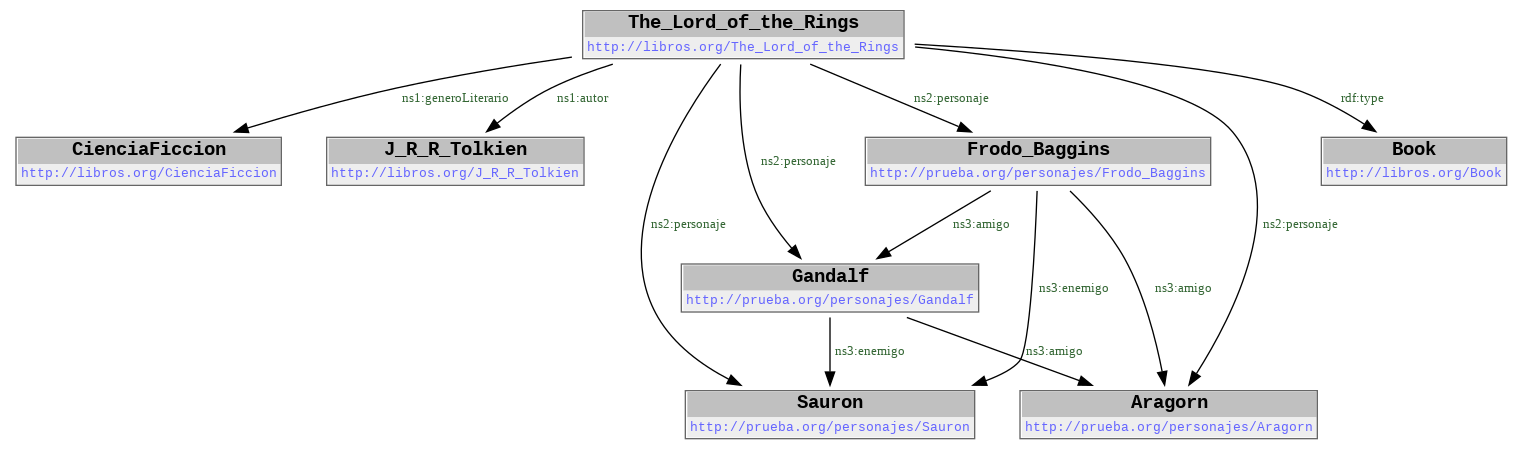

In [34]:
visualize(g3)

In [35]:
result = g3.query("""
PREFIX dbp: <http://prueba.org/personajes/>
PREFIX dbr: <http://prueba.org/relaciones/>

SELECT ?personaje ?amigo
WHERE {
  ?personaje dbr:amigo ?amigo .
}
""")
for row in result:
  print (row)

(rdflib.term.URIRef('http://prueba.org/personajes/Frodo_Baggins'), rdflib.term.URIRef('http://prueba.org/personajes/Aragorn'))
(rdflib.term.URIRef('http://prueba.org/personajes/Gandalf'), rdflib.term.URIRef('http://prueba.org/personajes/Aragorn'))
(rdflib.term.URIRef('http://prueba.org/personajes/Frodo_Baggins'), rdflib.term.URIRef('http://prueba.org/personajes/Gandalf'))


In [36]:
result = g3.query("""
SELECT ?personaje ?enemigo
WHERE {
  ?personaje dbr:enemigo ?enemigo .
}
""", initNs={'dbr': dbr, 'dbp': dbp})
for row in result:
  print(row)

(rdflib.term.URIRef('http://prueba.org/personajes/Gandalf'), rdflib.term.URIRef('http://prueba.org/personajes/Sauron'))
(rdflib.term.URIRef('http://prueba.org/personajes/Frodo_Baggins'), rdflib.term.URIRef('http://prueba.org/personajes/Sauron'))


# Ejercicio 6: SPARQL (1,5 ptos)

Dado el siguiente grafo:

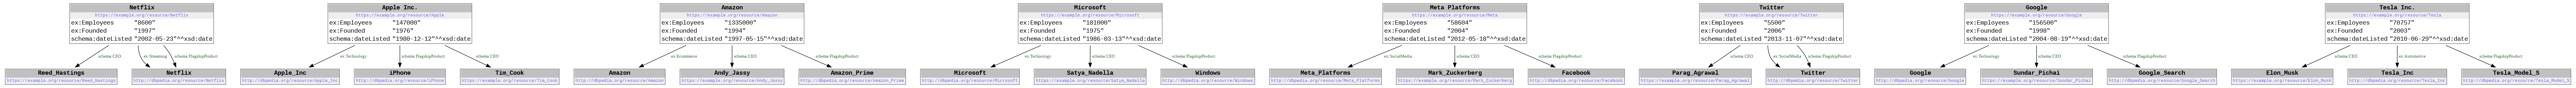

In [37]:
cars = '''@prefix ex: <https://example.org/resource/> .
@prefix schema: <https://schema.org/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix dbr: <http://dbpedia.org/resource/> .
@prefix dbo: <http://dbpedia.org/ontology/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:Netflix ex:Streaming dbr:Netflix ;
    schema:CEO ex:Reed_Hastings ;
    ex:Employees "8600";
    ex:Founded "1997";
    schema:dateListed "2002-05-23"^^xsd:date ;
    schema:FlagshipProduct dbr:Netflix;
    rdfs:label "Netflix"@en .

ex:Meta ex:SocialMedia dbr:Meta_Platforms ;
    schema:CEO ex:Mark_Zuckerberg ;
    ex:Employees "58604";
    ex:Founded "2004";
    schema:dateListed "2012-05-18"^^xsd:date ;
    schema:FlagshipProduct dbr:Facebook;
    rdfs:label "Meta Platforms"@en .

ex:Apple ex:Technology dbr:Apple_Inc ;
    schema:CEO ex:Tim_Cook ;
    ex:Employees "147000";
    ex:Founded "1976";
    schema:dateListed "1980-12-12"^^xsd:date ;
    schema:FlagshipProduct dbr:iPhone;
    rdfs:label "Apple Inc."@en .

ex:Microsoft ex:Technology dbr:Microsoft ;
    schema:CEO ex:Satya_Nadella ;
    ex:Employees "181000";
    ex:Founded "1975";
    schema:dateListed "1986-03-13"^^xsd:date ;
    schema:FlagshipProduct dbr:Windows;
    rdfs:label "Microsoft"@en .

ex:Amazon ex:Ecommerce dbr:Amazon ;
    schema:CEO ex:Andy_Jassy ;
    ex:Employees "1335000";
    ex:Founded "1994";
    schema:dateListed "1997-05-15"^^xsd:date ;
    schema:FlagshipProduct dbr:Amazon_Prime;
    rdfs:label "Amazon"@en .

ex:Google ex:Technology dbr:Google ;
    schema:CEO ex:Sundar_Pichai ;
    ex:Employees "156500";
    ex:Founded "1998";
    schema:dateListed "2004-08-19"^^xsd:date ;
    schema:FlagshipProduct dbr:Google_Search;
    rdfs:label "Google"@en .

ex:Tesla ex:Automotive dbr:Tesla_Inc ;
    schema:CEO ex:Elon_Musk ;
    ex:Employees "70757";
    ex:Founded "2003";
    schema:dateListed "2010-06-29"^^xsd:date ;
    schema:FlagshipProduct dbr:Tesla_Model_S;
    rdfs:label "Tesla Inc."@en .

ex:Twitter ex:SocialMedia dbr:Twitter ;
    schema:CEO ex:Parag_Agrawal ;
    ex:Employees "5500";
    ex:Founded "2006";
    schema:dateListed "2013-11-07"^^xsd:date ;
    schema:FlagshipProduct dbr:Twitter;
    rdfs:label "Twitter"@en .

'''


g_q1 = RDFGraph()
g_q1.parse (data=cars, format="turtle")

visualize (g_q1)

A continuación se pide resolver las consultas indicadas.



*   Seleccionar todas las empresas que son de SocialMedia.





In [38]:
from rdflib import Namespace

SCHEMA = Namespace('https://schema.org/')
DBR    = Namespace('http://dbpedia.org/resource/')
EX     = Namespace('https://example.org/resource/')

# TODO
query_social_media = """
SELECT DISTINCT ?company ?label
WHERE {
  ?company EX:SocialMedia ?platform .
  ?company rdfs:label ?label .
}
"""
result = g_q1.query(query_social_media, initNs={"EX": EX, "rdfs": Namespace("http://www.w3.org/2000/01/rdf-schema#")})



for row in result:
  print (row)

(rdflib.term.URIRef('https://example.org/resource/Meta'), rdflib.term.Literal('Meta Platforms', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Twitter'), rdflib.term.Literal('Twitter', lang='en'))


*   Seleccionar todas las empresas que fueron fundadas después de 2002 y tienen más de 40000 empleados.



In [39]:
querry_fundada_despues2002_mas40000 = """
SELECT DISTINCT ?company ?label
WHERE {
  ?company EX:Founded ?founded .
  ?company EX:Employees ?employees .
  ?company rdfs:label ?label .
  FILTER (?founded > "2002"^^xsd:date && ?employees > "40000"^^xsd:integer)
}
"""

result = g_q1.query(querry_fundada_despues2002_mas40000,
                    initNs={"EX": EX,
                            "xsd": Namespace("http://www.w3.org/2001/XMLSchema#"),
                            "rdfs": Namespace("http://www.w3.org/2000/01/rdf-schema#")})


In [40]:
for row in result:
    print(row)

(rdflib.term.URIRef('https://example.org/resource/Netflix'), rdflib.term.Literal('Netflix', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Meta'), rdflib.term.Literal('Meta Platforms', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Apple'), rdflib.term.Literal('Apple Inc.', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Microsoft'), rdflib.term.Literal('Microsoft', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Amazon'), rdflib.term.Literal('Amazon', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Google'), rdflib.term.Literal('Google', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Tesla'), rdflib.term.Literal('Tesla Inc.', lang='en'))
(rdflib.term.URIRef('https://example.org/resource/Twitter'), rdflib.term.Literal('Twitter', lang='en'))


*   Seleccionar aquellas empresas cuyo CEO tienen un nombre que comienza por S


In [41]:
query_ceo_s = """
SELECT ?company ?ceo
WHERE {
  ?company schema:CEO ?ceo .
  FILTER (STRSTARTS(STR(?ceo), STR(ex:S)))
}

"""
results = g_q1.query(query_ceo_s, initNs={'schema': SCHEMA, 'ex': EX })#,'rdfs': Namespace("http://www.w3.org/2000/01/rdf-schema#")})
for row in results:
    print(row)

(rdflib.term.URIRef('https://example.org/resource/Microsoft'), rdflib.term.URIRef('https://example.org/resource/Satya_Nadella'))
(rdflib.term.URIRef('https://example.org/resource/Google'), rdflib.term.URIRef('https://example.org/resource/Sundar_Pichai'))


In [42]:
g_q1.serialize(format="n3")


'@prefix dbr: <http://dbpedia.org/resource/> .\n@prefix ex: <https://example.org/resource/> .\n@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .\n@prefix schema: <https://schema.org/> .\n@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .\n\nex:Amazon rdfs:label "Amazon"@en ;\n    ex:Ecommerce dbr:Amazon ;\n    ex:Employees "1335000" ;\n    ex:Founded "1994" ;\n    schema:CEO ex:Andy_Jassy ;\n    schema:FlagshipProduct dbr:Amazon_Prime ;\n    schema:dateListed "1997-05-15"^^xsd:date .\n\nex:Apple rdfs:label "Apple Inc."@en ;\n    ex:Employees "147000" ;\n    ex:Founded "1976" ;\n    ex:Technology dbr:Apple_Inc ;\n    schema:CEO ex:Tim_Cook ;\n    schema:FlagshipProduct dbr:iPhone ;\n    schema:dateListed "1980-12-12"^^xsd:date .\n\nex:Google rdfs:label "Google"@en ;\n    ex:Employees "156500" ;\n    ex:Founded "1998" ;\n    ex:Technology dbr:Google ;\n    schema:CEO ex:Sundar_Pichai ;\n    schema:FlagshipProduct dbr:Google_Search ;\n    schema:dateListed "2004-08-19"^^xsd:date .\n

*   Seleccionar aquellas empresas cuyo CEO tienen un nombre que comienza por S

In [43]:
#TODO

*   Crea una consulta propia. Se valorará la originalidad.

In [44]:
query_listed_after_2010 = """
SELECT DISTINCT ?company ?label ?dateListed ?flagshipProduct
WHERE {
  ?company schema:dateListed ?dateListed .
  ?company schema:FlagshipProduct ?flagshipProduct .
  ?company rdfs:label ?label .
  FILTER (?dateListed > "2010-01-01"^^xsd:date)
}
"""

result = g_q1.query(query_listed_after_2010, initNs={"schema": SCHEMA, "xsd": XSD, "rdfs": RDFS})


In [45]:
for row in result:
  #print(row)
  print(f"Compañia: {row.label}       \tFundada: {row.dateListed} \tProducto estrella: {row.flagshipProduct}")


Compañia: Meta Platforms       	Fundada: 2012-05-18 	Producto estrella: http://dbpedia.org/resource/Facebook
Compañia: Tesla Inc.       	Fundada: 2010-06-29 	Producto estrella: http://dbpedia.org/resource/Tesla_Model_S
Compañia: Twitter       	Fundada: 2013-11-07 	Producto estrella: http://dbpedia.org/resource/Twitter
